In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [16]:
df = pd.read_csv(r"C:\Users\lengu\Downloads\Student_performance_data _.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2352,2353,2354,2355,2356,2357,2358,2359,2360,2361,2362,2363,2364,2365,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380,2381,2382,2383,2384,2385,2386,2387,2388,2389,2390,2391
StudentID,1001.000000,1002.000000,1003.000000,1004.000000,1005.000000,1006.000000,1007.000000,1008.000000,1009.000000,1010.000000,1011.000000,1012.000000,1013.000000,1014.000000,1015.000000,1016.000000,1017.000000,1018.000000,1019.000000,1020.000000,1021.000000,1022.000000,1023.000000,1024.000000,1025.000000,1026.000000,1027.000000,1028.000000,1029.000000,1030.000000,1031.000000,1032.000000,1033.000000,1034.000000,1035.000000,1036.000000,1037.000000,1038.000000,1039.000000,1040.000000,...,3353.000000,3354.000000,3355.000000,3356.000000,3357.000000,3358.000000,3359.000000,3360.000000,3361.000000,3362.000000,3363.000000,3364.000000,3365.000000,3366.000000,3367.000000,3368.000000,3369.000000,3370.000000,3371.000000,3372.000000,3373.000000,3374.000000,3375.000000,3376.000000,3377.000000,3378.000000,3379.000000,3380.000000,3381.000000,3382.000000,3383.000000,3384.000000,3385.000000,3386.000000,3387.000000,3388.000000,3389.000000,3390.000000,3391.000000,3392.000000
Age,17.000000,18.000000,15.000000,17.000000,17.000000,18.000000,15.000000,15.000000,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,18.000000,15.000000,18.000000,18.000000,18.000000,17.000000,16.000000,15.000000,16.000000,18.000000,18.000000,16.000000,16.000000,16.000000,18.000000,18.000000,15.000000,15.000000,18.000000,16.000000,16.000000,15.000000,18.000000,15.000000,15.000000,17.000000,...,17.000000,18.000000,16.000000,17.000000,16.000000,17.000000,16.000000,15.000000,18.000000,16.000000,17.000000,18.000000,18.000000,17.000000,16.000000,15.000000,15.000000,16.000000,18.000000,18.000000,18.000000,18.000000,16.000000,18.000000,17.000000,18.000000,15.000000,18.000000,16.000000,15.000000,16.000000,16.000000,15.000000,16.000000,16.000000,18.000000,17.000000,16.000000,16.000000,16.000000
Gender,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.000000,3.000000,2.000000,0.000000,1.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
ParentalEducation,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,3.000000,1.000000,3.000000,2.000000,0.000000,4.000000,1.000000,3.000000,1.000000,3.000000,0.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,2.000000,1.000000,3.000000,1.000000,2.

Student Information

Student ID

StudentID: A unique identifier assigned to each student (1001 to 3392).

Demographic Details

Age: The age of the students ranges from 15 to 18 years.

Gender: Gender of the students, where 0 represents Male and 1 represents Female.

Ethnicity: The ethnicity of the students, coded as follows:

0: Caucasian
1: African American
2: Asian
3: Other
ParentalEducation: The education level of the parents, coded as follows:
0: None
1: High School
2: Some College
3: Bachelor's
4: Higher
Study Habits
StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
Absences: Number of absences during the school year, ranging from 0 to 30.
Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.
Parental Involvement
ParentalSupport: The level of parental support, coded as follows:

0: None
1: Low
2: Moderate
3: High
4: Very High
Extracurricular Activities
Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.
Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.
Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.
Academic Performance
GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
Target Variable: Grade Class
GradeClass: Classification of students' grades based on GPA:
0: 'A' (GPA >= 3.5)
1: 'B' (3.0 <= GPA < 3.5)
2: 'C' (2.5 <= GPA < 3.0)
3: 'D' (2.0 <= GPA < 2.5)
4: 'F' (GPA < 2.0)


In [17]:
df = df.drop(columns=['StudentID'], axis=1)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000
Sports,2392.0,0.303512,0.459870,0.000000,0.000000,0.000000,1.000000,1.000000


In [19]:
df.isnull().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [20]:
nomial_columns = ['Ethnicity']

df = pd.get_dummies(df, columns=nomial_columns, prefix='Ethnicity', dtype=int)
##print("Kích thước dữ liệu sau khi One-Hot Encoding:", df.shape)
##print("\n5 dòng đầu tiên của các cột Ethnicity mới:")
##print(df.filter(like='Ethnicity_').head())

In [21]:
df['GradeClass'].value_counts()

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE


In [24]:
X = df.drop(['GradeClass','GPA'], axis=1)
y = df['GradeClass']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [29]:
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42, algorithm='SAMME')
}

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

--- Training XGBoost ---
Accuracy: 0.6618
Classification Report:
              precision    recall  f1-score   support

         0.0       0.47      0.41      0.44        22
         1.0       0.47      0.55      0.51        49
         2.0       0.48      0.42      0.45        85
         3.0       0.45      0.44      0.45        86
         4.0       0.85      0.87      0.86       237

    accuracy                           0.66       479
   macro avg       0.55      0.54      0.54       479
weighted avg       0.66      0.66      0.66       479



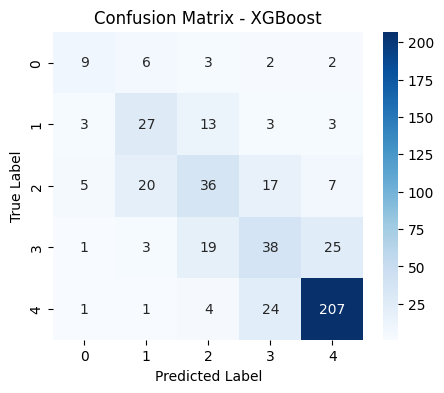

--------------------------------------------------
--- Training Gradient Boosting ---
Accuracy: 0.6388
Classification Report:
              precision    recall  f1-score   support

         0.0       0.28      0.23      0.25        22
         1.0       0.39      0.49      0.43        49
         2.0       0.48      0.39      0.43        85
         3.0       0.43      0.48      0.45        86
         4.0       0.87      0.86      0.86       237

    accuracy                           0.64       479
   macro avg       0.49      0.49      0.48       479
weighted avg       0.64      0.64      0.64       479



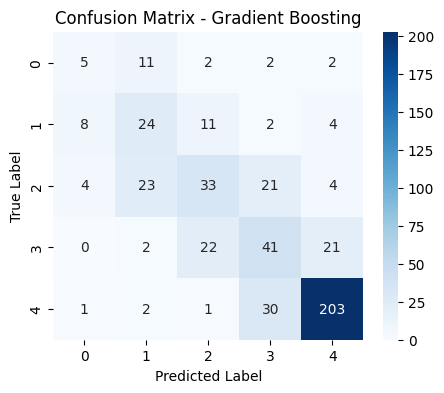

--------------------------------------------------
--- Training AdaBoost ---
Accuracy: 0.6033
Classification Report:
              precision    recall  f1-score   support

         0.0       0.11      0.14      0.12        22
         1.0       0.30      0.41      0.34        49
         2.0       0.53      0.38      0.44        85
         3.0       0.40      0.51      0.45        86
         4.0       0.88      0.80      0.84       237

    accuracy                           0.60       479
   macro avg       0.45      0.45      0.44       479
weighted avg       0.64      0.60      0.62       479



c:\Users\lengu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


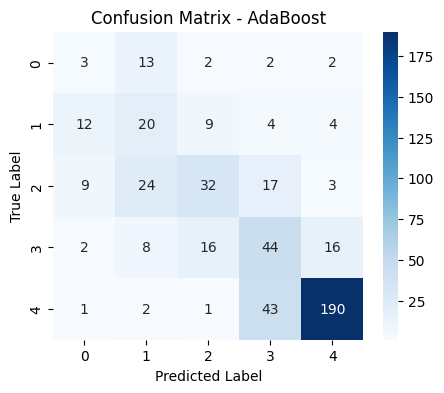

--------------------------------------------------


In [33]:
for name, model in models.items():
    print(f"--- Training {name} ---")
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_test)
    
    # In ra Accuracy
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    
    # In ra báo cáo chi tiết (Precision, Recall, F1)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Vẽ Confusion Matrix
    plt.figure(figsize=(5,4))
    cm = confusion_matrix(y_test, y_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    print("-" * 50)

C:\Users\lengu\AppData\Local\Temp\ipykernel_27712\1992083931.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


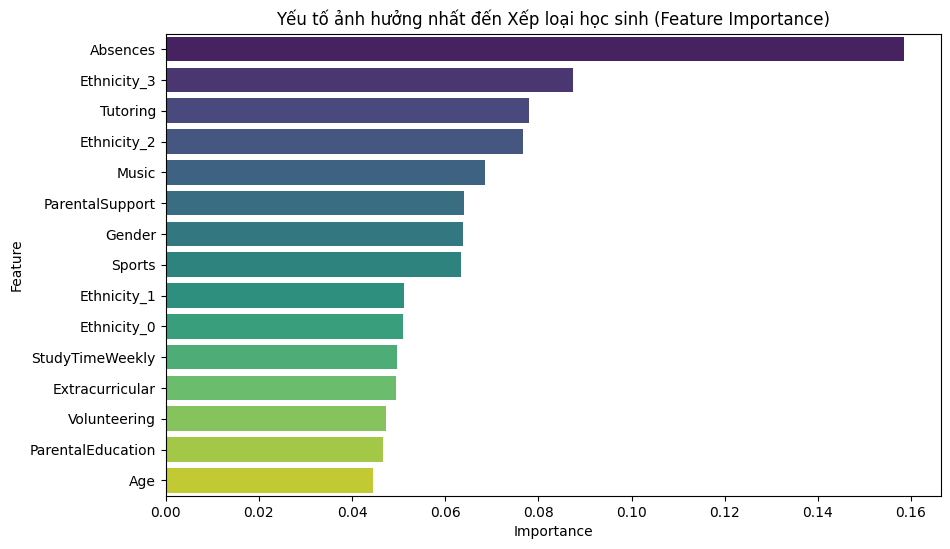

In [40]:
# Lấy mô hình XGBoost đã train (giả sử nó nằm đầu tiên trong dict models hoặc bạn train lại)
best_model = models["XGBoost"]

# Lấy giá trị quan trọng
importances = best_model.feature_importances_
feature_names = X.columns

# Tạo DataFrame để dễ vẽ
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sb.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Yếu tố ảnh hưởng nhất đến Xếp loại học sinh (Feature Importance)')
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV

# Định nghĩa không gian tham số cần thử
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 800, 900, 1000],
    'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
    'learning_rate': [0.01, 0.036 ,0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

print("Đang tìm tham số tốt nhất cho XGBoost...")
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    param_grid=param_grid,
    cv=3, # Chia 3 phần kiểm tra chéo
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_train_res, y_train_res) # Train trên tập đã SMOTE

print("Tham số tốt nhất:", grid_search.best_params_)
print("Accuracy tốt nhất (trên tập train):", grid_search.best_score_)

# Kiểm tra lại trên tập test
best_xgb = grid_search.best_estimator_
y_pred_tuned = best_xgb.predict(x_test)
print("\nKết quả sau khi tinh chỉnh:")
print(classification_report(y_test, y_pred_tuned))

Đang tìm tham số tốt nhất cho XGBoost...
Fitting 3 folds for each of 1188 candidates, totalling 3564 fits
Tham số tốt nhất: {'learning_rate': 0.2, 'max_depth': 13, 'n_estimators': 800}
Accuracy tốt nhất (trên tập train): 0.8655176966573487

Kết quả sau khi tinh chỉnh:
              precision    recall  f1-score   support

         0.0       0.35      0.36      0.36        22
         1.0       0.38      0.41      0.40        49
         2.0       0.44      0.41      0.42        85
         3.0       0.41      0.40      0.40        86
         4.0       0.84      0.86      0.85       237

    accuracy                           0.63       479
   macro avg       0.49      0.49      0.49       479
weighted avg       0.62      0.63      0.63       479



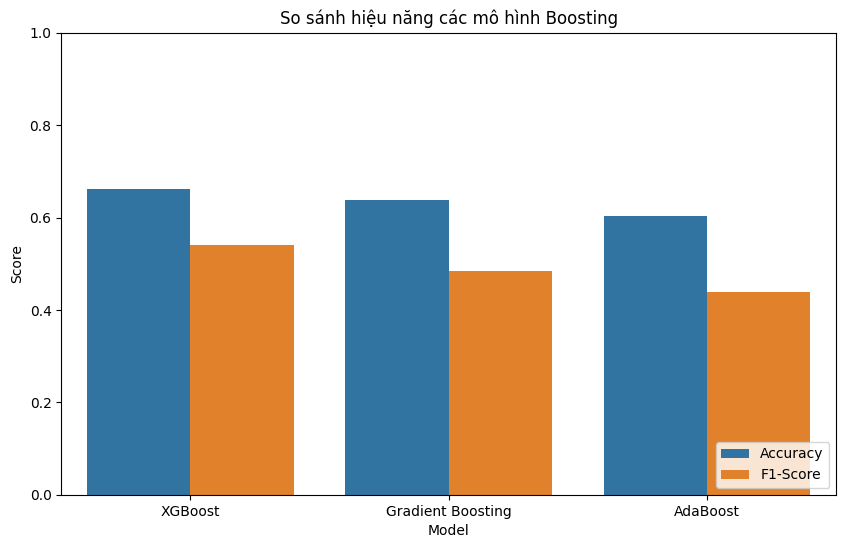

In [39]:
# Lưu kết quả vào list
model_names = []
accuracies = []
f1_scores = []

for name, model in models.items():
    y_pred = model.predict(x_test)
    model_names.append(name)
    accuracies.append(accuracy_score(y_test, y_pred))
    # f1_score macro average cho bài toán nhiều lớp
    from sklearn.metrics import f1_score
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

# Vẽ biểu đồ so sánh
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'F1-Score': f1_scores
})

# Chuyển đổi format để vẽ bằng seaborn
comparison_melted = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sb.barplot(x='Model', y='Score', hue='Metric', data=comparison_melted)
plt.title('So sánh hiệu năng các mô hình Boosting')
plt.ylim(0, 1.0) # Giới hạn trục Y từ 0 đến 1
plt.legend(loc='lower right')
plt.show()